# CMSE 201: Quiz 3 (Spring 2024)

## <p style="text-align: right;"> &#9989; Put your name here</p>


The goal of this quiz is to give you the opportunity to test out more of the skills that you've developed thus far this semester. In particular, you'll reflect on what you know about writing code using Python and showcase some of your more recently acquired programming skills.

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However, the use of any person-to-person communication software is absolutely not acceptable.**

**Do your own work.** This quiz is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. Any violation of academic integrity could result in you receiving a zero on the quiz.

There are a total of **35 points** possible on this quiz and each part of the quiz can be done independently. **If you get stuck _move on to another part of the quiz to earn some points there!_**


![Moira](https://media.giphy.com/media/26gs78HRO8sOuhTkQ/giphy.gif)

## ---
<a id="toc"></a>

## Table of Contents

[Part 1. Loading and exploring data](#part_1)  (15 points)

[Part 2. Data visualization](#part_1)  (20 points)


In [1]:
points_list = [15, 20]

print(f"The total number of points is : {sum(points_list)}")

The total number of points is : 35


In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd
import seaborn as sns


---
<a id="part_1"></a>

# Part 1. Loading, exploring, and masking data with Pandas (15 points)
[Back to Top](#toc)



### 1.1.1 Read the data 
&#9989; **Task: (2 points)** Read in the Automobile data file as a pandas dataframe and display the first 10 rows

In [3]:
data = pd.read_csv("Auto.csv")
data.iloc[0:10]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


As you can see, this dataset contains information about automobiles. The columns are mostly self-explanatory, except for **'origin'**, which represents the country of origin for the car: **1** stands for American, **2** for European, and **3** for Japanese.

### 1.2 Describe the data (6 points)
&#9989; **Task: (6 points)** Now, write some code to inspect some of the properties of the data and then answer the following questions:

* Use a command to look at summary statistics (like the count, min, max, and mean) for columns with continuous data
* What are the names of the columns?
* How many rows are in this dataset?
* How many different (or `unique`) cylinders are in the dataset?
* Using `.iloc`, display the rows from 26 to 36 of the `horsepower` column.
* Using `dropna()`function drop the missing values.

**1.** Use a command to look at summary statistics (like the count, min, max, and mean) for columns with continuous data

In [4]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


**2.** What are the names of the columns?

In [5]:
c = data.columns
print(c)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')


**3.** How many rows are in this dataset?

In [6]:
print(len(data["origin"]))

397


**4.** How many different (or `unique`) cylinders are in the dataset?

In [7]:
print(data["cylinders"].unique())

[8 4 6 3 5]


**5.** Using `.iloc`, display the rows from 26 to 36 of the `horsepower` column.

In [8]:
print(c[3], '\n', data.iloc[26:37,3])

horsepower 
 26    200
27    210
28    193
29     88
30     90
31     95
32      ?
33    100
34    105
35    100
36     88
Name: horsepower, dtype: object


From the above code, we can find '?' in row 32 which means the value is missing, you can use `replace` function to replace it with 'nan' and then drop the missing values.

In [9]:
### Example of replacing "?" with nan in data_df
data = data.replace("?", np.nan)
print(c[3], '\n', data.iloc[26:37,3])

horsepower 
 26    200
27    210
28    193
29     88
30     90
31     95
32    NaN
33    100
34    105
35    100
36     88
Name: horsepower, dtype: object


**6.** Using `dropna()`function drop the missing values.

In [10]:
data = data.dropna()
print(c[3], '\n', data.iloc[26:37,3])
# Row is gone!

horsepower 
 26    200
27    210
28    193
29     88
30     90
31     95
33    100
34    105
35    100
36     88
37    100
Name: horsepower, dtype: object


### 1.2 Visualization and data analysis (7 points)

Now that you understand a bit about the overall information of the data, you want to use `seaborn` to examine the type of engine cylinder that has the highest `mpg` value. 

&#9989; **Task: (5 points)** Make a boxplot comparing the `mpg` values of different cylinder dates where the x-axis is "cylinders" and the y-axis "mpg". 

Your plot should:

1. have a figure of size (10, 8)
2. include axis labels
3. have a title


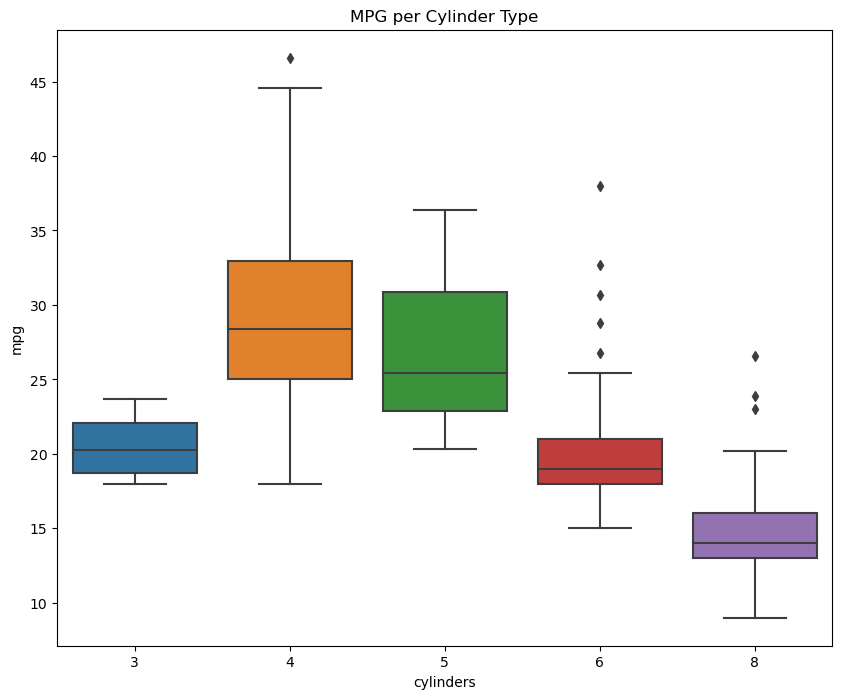

In [11]:
#data = sns.load_dataset("Auto.csv")
plt.figure(figsize=(10,8));
sns.boxplot(x=data["cylinders"],y=data["mpg"],data=data);
plt.title("MPG per Cylinder Type");


&#9989; **Question: (2 points)** Based on your graph, answer these questions:

1. What type of cylinder engine has the highest mpg value?
2. What type of cylinder engine has the lowest mpg value?


1. The 4 cylinder engine has the highest median mpg value as indicated by the line in the middle of the orange box. 4 also spreads to the highest point compared to the other boxes.
2. The 8 cylinder engine has the lowest median and it's entire spread is below all other boxes in terms of mpg.

## Part 2  Correlations and its visualization[20 points]

As you can see there are columns with numerical values and columns with string values in the above automobile dataset. Obviously, we can look for correlations only on the f columns with numerical values.

### 2.1 Find the correlation between columns with numerical values [5 points]
&#9989;&nbsp; **Task (2 points):** Print a correlation matrix of the columns with numerical values in the above dataframe. _Hint:_ Look up the `corr` function of dataframes, if you have both numerical values and string values in dataframe, then you should let `numerical_only = True` in the `corr` function.

[Back to Top](#toc)



In [12]:
numerical_columns = data.select_dtypes(include=['number'])

corr_m = numerical_columns.corr()

corr_m

#Help from chatGPT.

,mpg,cylinders,displacement,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000


&#9989;&nbsp; **Task (3 points):** Based on the correlation matrix of the columns, please answer the following questions

- **1.** Which columns have a positive correlation with **mpg**?
- **2.** Which columns have a negative correlation with **mpg**?

1. With mpg, mpg, acceleration, year, and origin have a positive correlation.
2. With mpg, cylinders, diplacement, and weight columns have a negative correlation.

### 2.2 Correlation visualization [15 points]
The numbers above give us a quantitative measure of the correlations in the dataset. In this part, we want to visualize the correlations.
Normal plots can only show two columns of data at a time. However, there are ways to show three or four columns of data at the same time. (More than four is still possible, however, that plot might be confusing to understand.) The way to plot three columns of data at once is to use the x-axis, y-axis, and color-axis. You have done this before, so let's do it again. 

&#9989;&nbsp; **Task (11 points):** In the above, we have noticed that mpg and time year have a positive correlation, in the following, you will use `seaborn` to make one figure containing mpg, year, and origin columns' information.

The x-axis and y-axis will contain column **year** and **mpg** information, while the color axis will be used for the origin. Here origin **1** stands for American, **2** for European, and **3** for Japanese.

Your plot should have the following characteristics:
- The entire figure should be 10 inches wide and 8 inches tall **(1 point)**.
- Time year on the $x$ -axis and mpg on the $y$ -axis **(2 point)**
- Label the $x$-axis as **Time (Year)** and the $y$-axis as **MPG** **(1 point)**
- Color the origin based on their origin. **(2 points)**.
- Show the legend **(1 point)**.

**Side notes**

You can choose any color scheme you want as long as it clearly differentiates the origin. The color scheme used in the example plot is given below, if you want to use it. 

We want to make a plot similar to this one
![mpg_year](./mpg_year.png)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


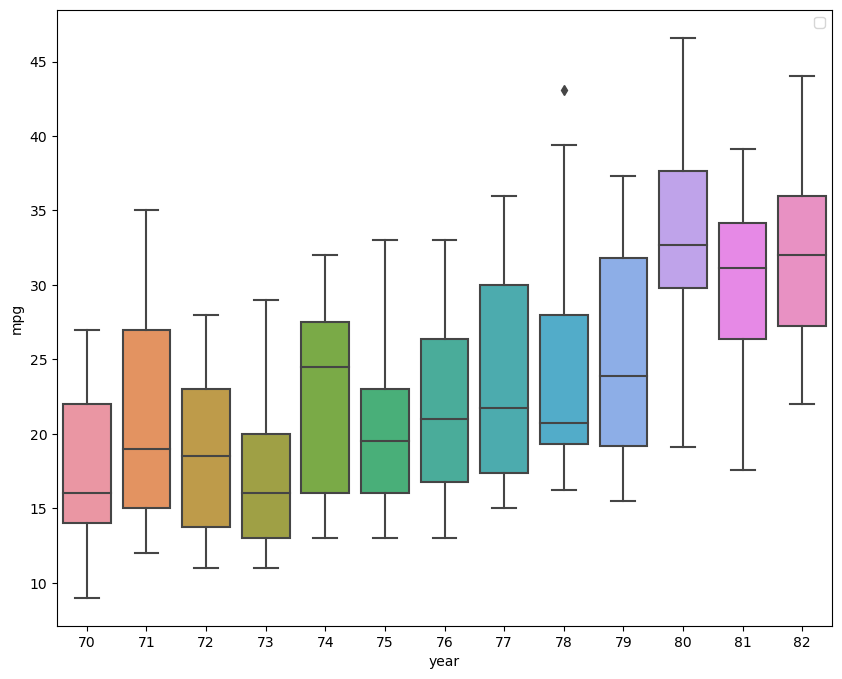

In [13]:
# These colors are a personal choice of one of the instructors. 
# You don't have to choose this, you can choose any color scheme you want. 
# If you are interested in knowing more about this color scheme Google "Okabe-Ito color palette"
scolor = ["#E69F00", "#000000", "#0072B2"]

plt.figure(figsize=(10,8));
sns.boxplot(x=data["year"], y=data["mpg"])
plt.legend()

&#9989;&nbsp; **Questions: (4 points)** Looking at the plot, 
1. Which origin engine has the highest mpg values?
2. Which origin engine has the lowest mpg values?

In [14]:
# Put your answer here

---

# Congratulations, you're done!

Submit this quiz by uploading it to the course Desire2Learn web page.  

Go to the **Quizzes** section, find the submission folder link for **Quiz 03**, and upload it there.


![Moira2](https://media.giphy.com/media/d1E2HnwywoTkES08/giphy.gif)